# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/zarahbaloch/Downloads/Wholesale_Data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.shape

(440, 8)

In [7]:
#cleaning data 

print(df.isnull().sum())
#no missing data!

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [9]:
print(f"Duplicate rows: {df.duplicated().sum()}")
#no duplicates! 

Duplicate rows: 0


In [11]:
#data discovery
df.describe()

#central tendencies + descriptors of the data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [13]:
df.median()
#median for each (not shown in 'df.describe()')

Channel                1.0
Region                 3.0
Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicassen           965.5
dtype: float64

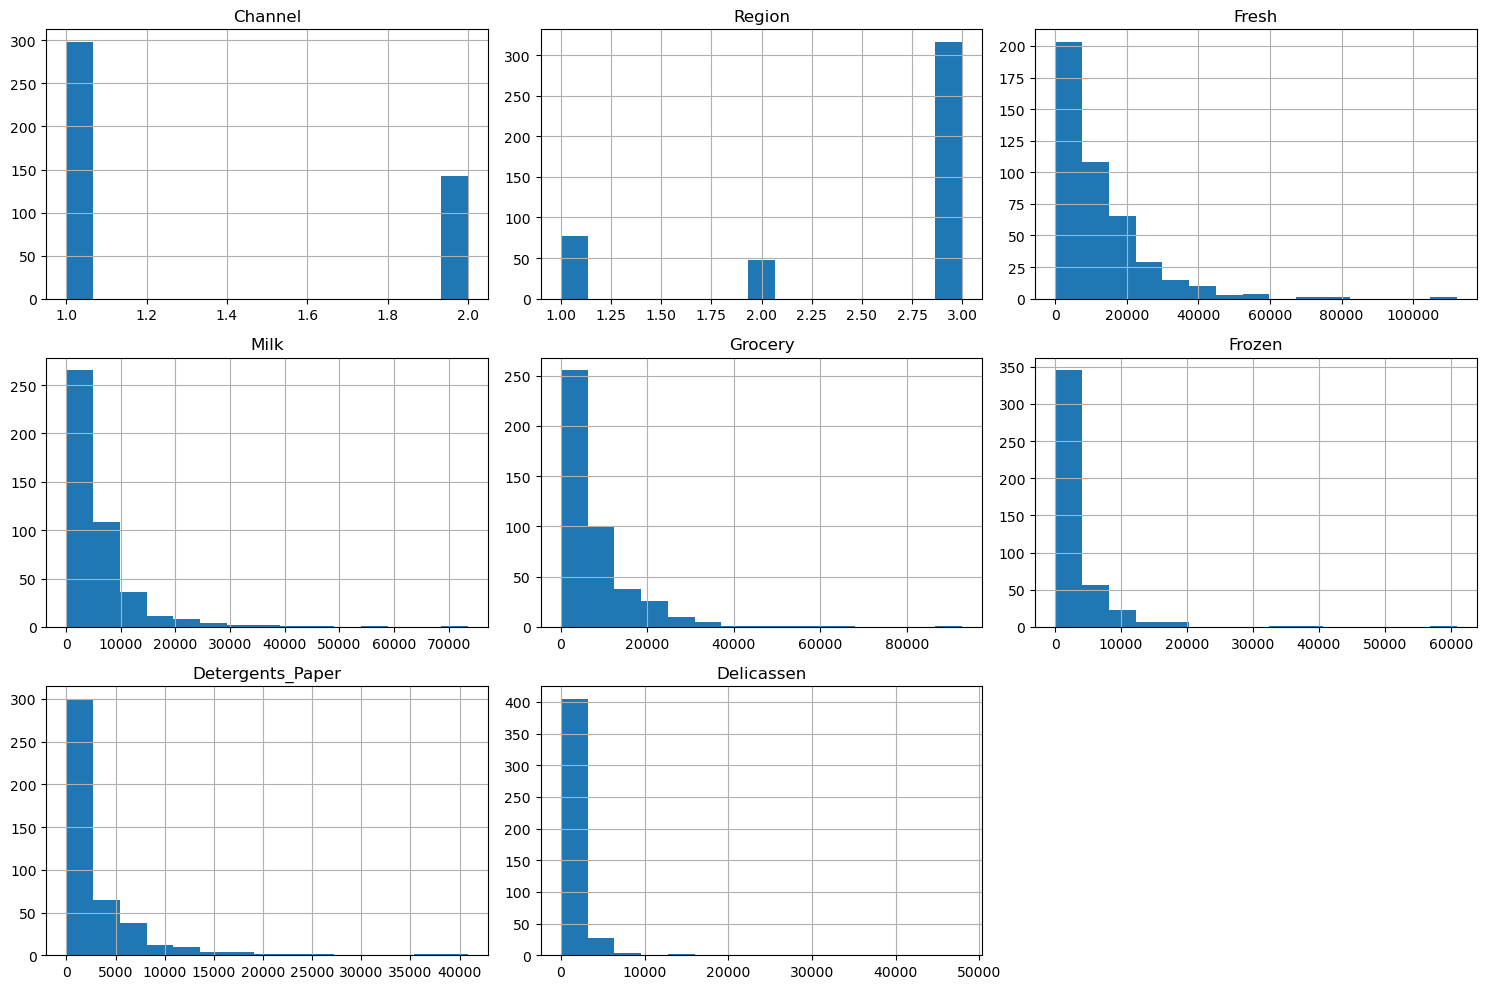

In [15]:
#data visualization (histogram) 
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

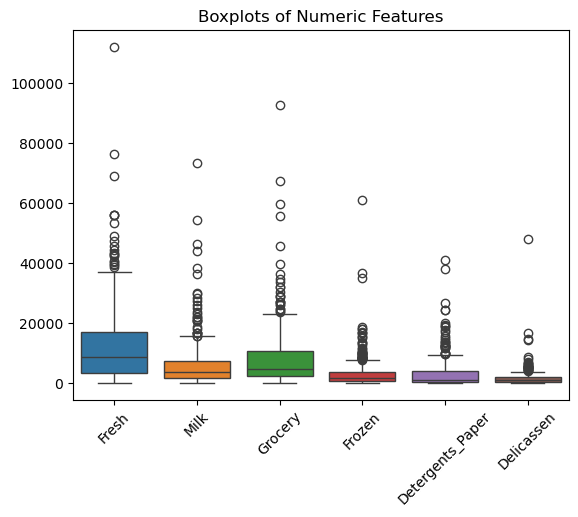

In [16]:
#data visualization (boxplot) 
sns.boxplot(data=df.drop(columns=['Channel', 'Region'])) #(categorical columns must be excluded)
plt.xticks(rotation=45)
plt.title('Boxplots of Numeric Features')
plt.show()

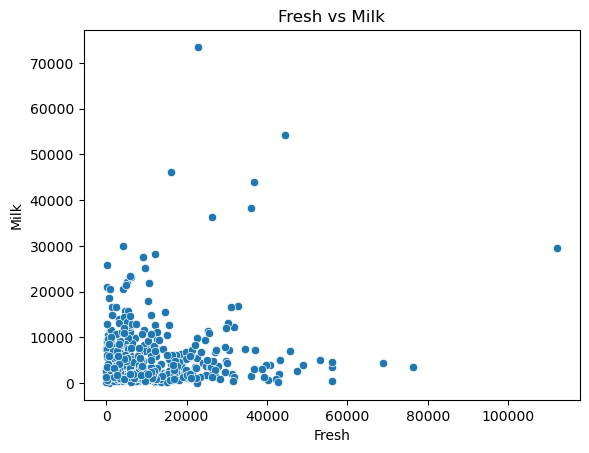

In [17]:
#data visualization (scatterplot)- relationship between fresh products being purchased & milk being purchased
sns.scatterplot(data=df, x='Fresh', y='Milk')
plt.title('Fresh vs Milk')
plt.show()

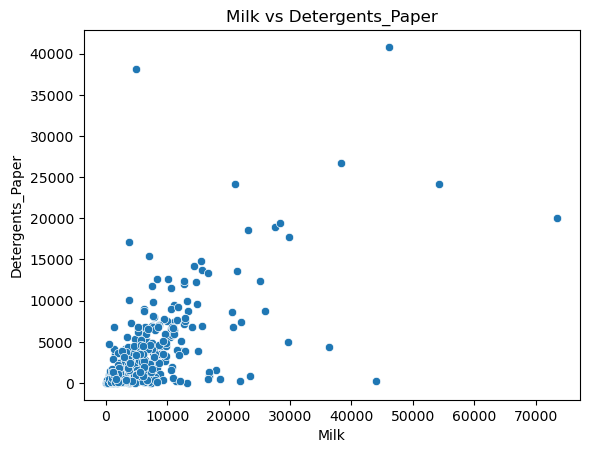

In [18]:
#data visualization (scatterplot)- relationship between detergent products being purchased & milk being purchased
sns.scatterplot(data=df, x='Milk', y='Detergents_Paper')
plt.title('Milk vs Detergents_Paper')
plt.xlabel('Milk')
plt.ylabel('Detergents_Paper')
plt.show()

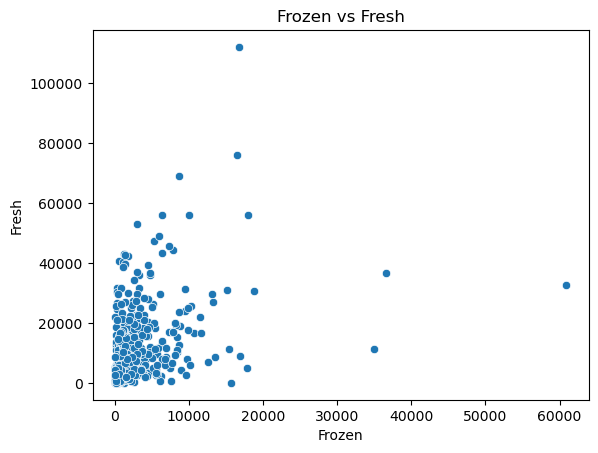

In [23]:
#data visualization (scatterplot)- relationship between frozen products being purchased & fresh products being purchased
sns.scatterplot(data=df, x='Frozen', y='Fresh')
plt.title('Frozen vs Fresh')
plt.xlabel('Frozen')
plt.ylabel('Fresh')
plt.show()

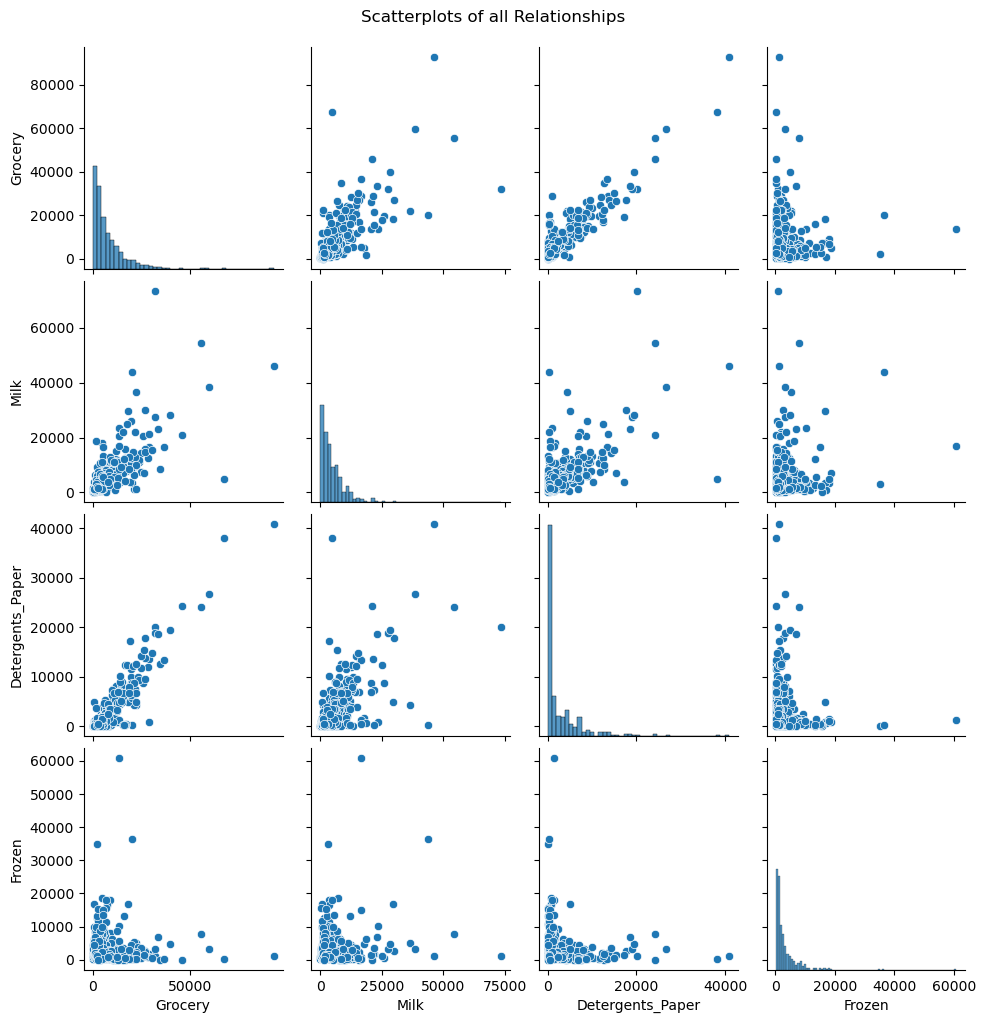

In [25]:
#scatterplot outlining numerous relationships in the dataset
all = ['Grocery', 'Milk', 'Detergents_Paper', 'Frozen']
sns.pairplot(df[all])
plt.suptitle("Scatterplots of all Relationships", y=1.02)
plt.show()

In [26]:
#outlier detection

from scipy.stats import zscore

z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).any(axis=1)

print(outliers.sum())

#there is a total of 26 outliers (visually depicted in boxplot above) 

26


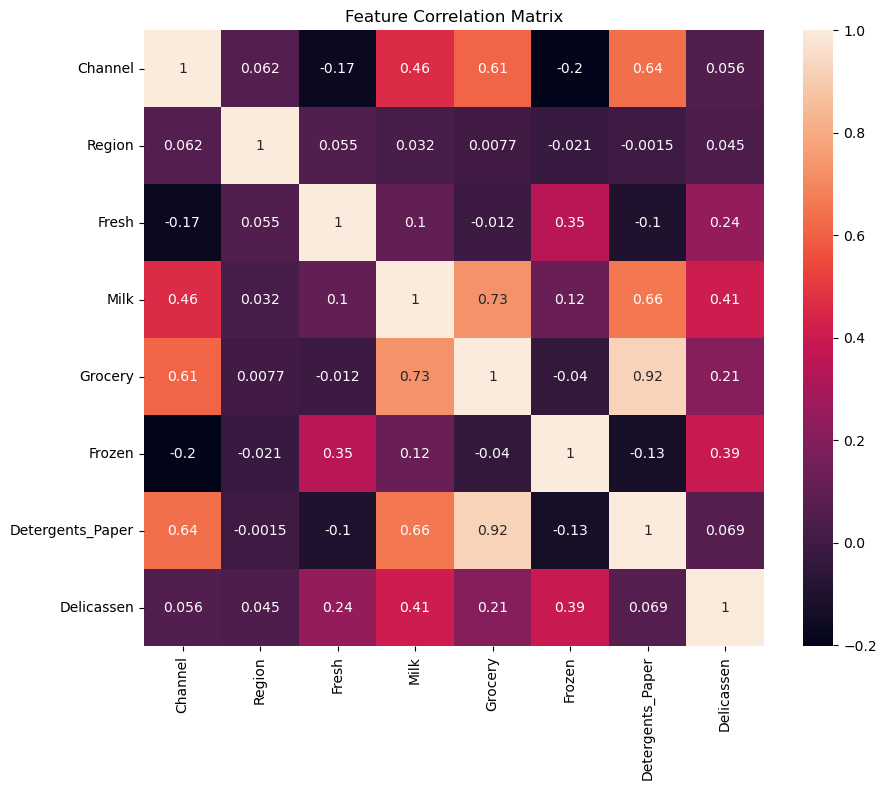

In [28]:
#correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
sns.color_palette("flare", as_cmap=True)
plt.title("Feature Correlation Matrix")
plt.show()

In [87]:
corr_matrix = df.corr()
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
top_correlators = corr_pairs.reindex(corr_pairs['Correlation'].abs().sort_values(ascending=False).index)
top_correlators.head(10)

#gives us the top correlating pairs in table format

,Feature 1,Feature 2,Correlation
0,Channel,Channel,1.0
13,Region,Region,1.0
130,PCA2,PCA2,1.0
117,PCA1,PCA1,1.0
104,KMeans_Cluster,KMeans_Cluster,1.0
91,Delicassen,Delicassen,1.0
78,Detergents_Paper,Detergents_Paper,1.0
65,Frozen,Frozen,1.0
52,Grocery,Grocery,1.0
39,Milk,Milk,1.0


In [37]:
#data transformation (standardizing all numerical columns)
from sklearn.preprocessing import StandardScaler

features = df.drop(columns=['Channel', 'Region']) 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [39]:
#feature selection 

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)

[0.44082893 0.283764  ]


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#making an intertia list for k values
inertia = []

#choosing # of clusters from 1-10 
for k in range(1, 11):
    #intialize centroids
    model = KMeans(n_clusters=k, random_state=42)
    #assign centroid points
    model.fit(X_scaled)
    inertia.append(model.inertia_)

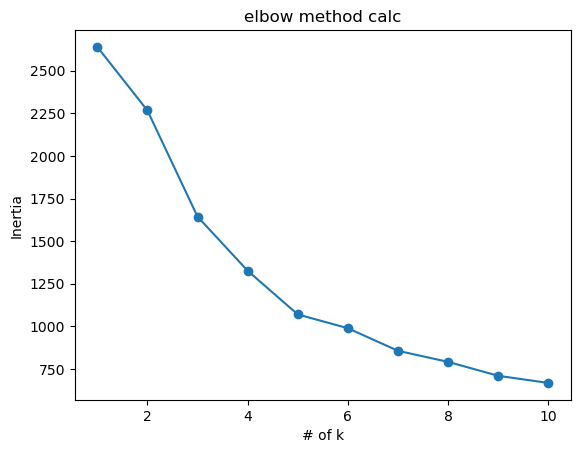

In [47]:
#plotting the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('# of k')
plt.ylabel('Inertia')
plt.title('elbow method calc')
plt.show()

In [49]:
#assign clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

In [51]:
#run PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#PCA columns
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

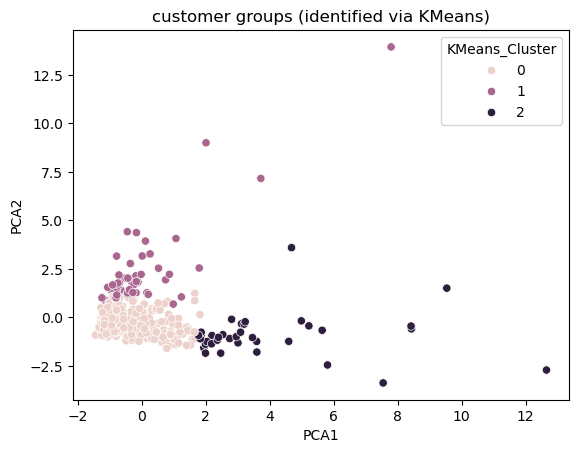

In [53]:
#visualize clusters
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df)
plt.title('customer groups (identified via KMeans)')
plt.show()

In [55]:
#cluster analysis
df.groupby('KMeans_Cluster').mean().round(0)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,PCA1,PCA2
KMeans_Cluster,,,,,,,,,,
0,1.0,3.0,8936.0,4229.0,5848.0,2167.0,1914.0,1102.0,-0.0,-0.0
1,1.0,3.0,34540.0,5860.0,6123.0,9842.0,981.0,3664.0,0.0,2.0
2,2.0,2.0,8705.0,20534.0,30466.0,1933.0,14759.0,2459.0,4.0,-1.0


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [59]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

In [61]:
#linkage matrix (how close points are + merge history)
Z = linkage(X_scaled)

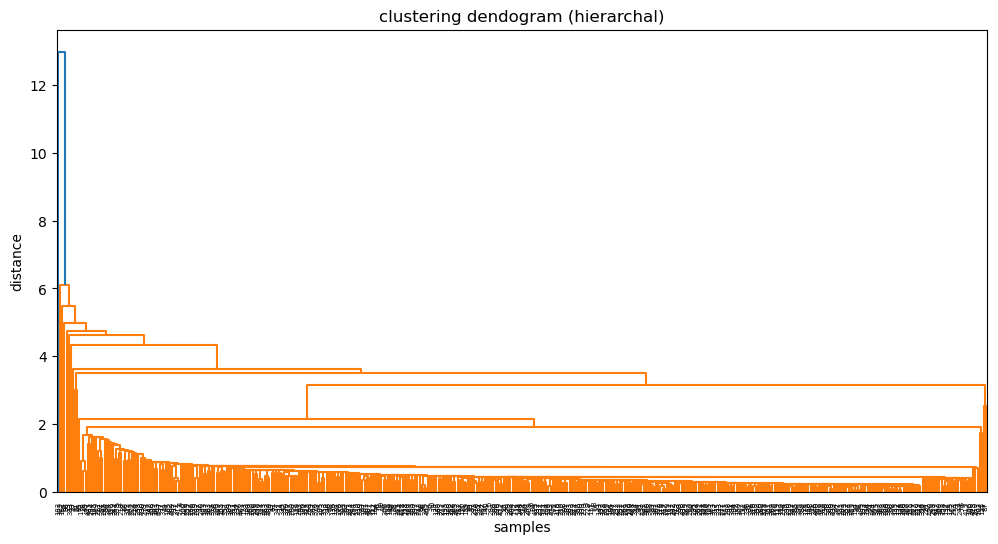

In [63]:
#plotting the dendogram 
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('clustering dendogram (hierarchal)')
plt.xlabel('samples')
plt.ylabel('distance')
plt.show()

In [64]:
#formation of clusters from dendogram (assigns points to 1 of 3 clusters)
df['Hierarchical_Cluster'] = fcluster(Z, t=3, criterion='maxclust')

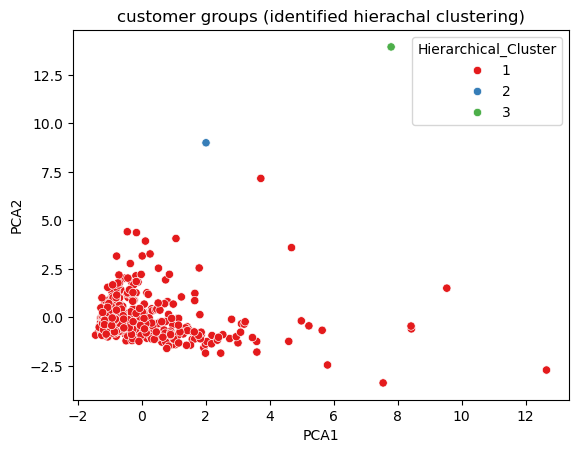

In [67]:
#visualize the clusters
sns.scatterplot(x='PCA1', y='PCA2', hue='Hierarchical_Cluster', data=df, palette='Set1')
plt.title('customer groups (identified hierachal clustering)')
plt.show()

In [69]:
#avg feature value per cluster
df.groupby('Hierarchical_Cluster').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans_Cluster,PCA1,PCA2
Hierarchical_Cluster,,,,,,,,,,,
1,1.324201,2.543379,11896.271689,5684.070776,7910.424658,2863.577626,2891.200913,1409.568493,0.285388,-0.022403,-0.052408
2,1.000000,2.000000,32717.000000,16784.000000,13626.000000,60869.000000,1272.000000,5609.000000,1.000000,2.014356,9.005487
3,1.000000,3.000000,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000,1.000000,7.797940,13.949084


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [73]:
from sklearn.decomposition import PCA
#run PCA on scaled data
pca = PCA(n_components=None)
pca.fit(X_scaled)

PCA()

In [75]:
#explained variance (how much variance each PC holds) 
pca.explained_variance_ratio_

array([0.44082893, 0.283764  , 0.12334413, 0.09395504, 0.04761272,
       0.01049519])

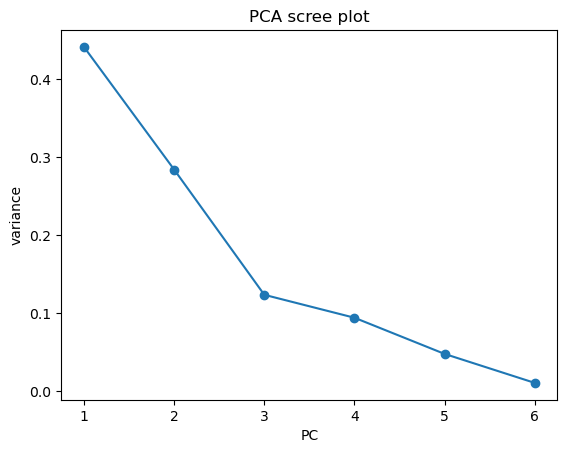

In [77]:
#scree plot (visualizing variance per PC)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('PC')
plt.ylabel('variance')
plt.title('PCA scree plot')
plt.show()

In [83]:
#how much each feature contributes to PC
X=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper','Delicassen']

featurecont = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(pca.components_))],
                        index=X)
featurecont

,PC1,PC2,PC3,PC4,PC5,PC6
Fresh,0.042884,0.527932,-0.812257,-0.236686,-0.048683,-0.036025
Milk,0.545118,0.083168,0.060388,-0.087190,0.826579,-0.038040
Grocery,0.579256,-0.146088,-0.108384,0.105987,-0.314999,0.721745
Frozen,0.051189,0.611278,0.178386,0.768683,-0.027932,-0.015637
Detergents_Paper,0.548640,-0.255233,-0.136192,0.171744,-0.339640,-0.685894
Delicassen,0.248682,0.504207,0.523904,-0.552065,-0.314701,-0.075134


In [ ]:
#reduced to 2d for visualization
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

#PCA comlumns in df
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

In [ ]:
#visualize the clusters
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df,)
plt.title('customer groups (identified via PCA)')
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- KMeans created 3 customer groups: (Cluster0= average, balanced spenders (baseline)),(Cluster1= predominantly purchased fresh, frozen & delicassen),(Cluster2= predominantly purchased milk, grocery and detergent_papers).
- Hierarchal clustering focused on outliers. This method grouped together customers with very high spending in categories such as milk & delicassen, which allowed us to see less frequent but important spending patterns that were not as distinct in the KMeans model.
- Principal Component Analysis (PCA) broke the dataset into 2 dominant spending trends. PC1 captured a spending pattern for grocery, milk & detergent (similar to household spending items) whilsts PC2 captured perishable spending (fresh, frozen & delicassen). All together, this is the most variance in the dataset
- Regarding EDA, most features showed right skewed distributions with majority customers spending relatively low amounts, with outliers spending extremely high amounts. The median values reflected the spending patterns, showing grocery (≈ 4755), milk (≈ 3627), and fresh (≈ 8504) were the most commonly purchased product categories. 